In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [16]:
import pandas as pd

clinic_data = pd.read_excel('/content/Clinical_Sales (1).xlsx')
print(clinic_data.shape)
clinic_data.head(10)

(3000, 63)


,FiscalPeriod,IntVerticalGroupDesc,CurrencyCode,COS & OE,Net Revenue,Gross Profit,Volume - Pounds/Dry,BP Net Rev,VolumeCust_Actual_LB,CC1Region,...,NewProductCategory,NewProductEffDate,LIFOPoolDesc,Plant,MaterialDesc,CustomerGroup1Desc,Division,BP DOP,Total Revenue,Sales_Demand
0,17.99,10.38,2,1001.0,2871.00,0.27760,0.30010,2871.00,0.2419,2,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,17.99,10.38,High
1,20.57,17.77,5,1326.0,2765.90,0.07864,0.08690,2765.90,0.1812,5,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,20.57,17.77,Low
2,19.69,21.25,2,1203.0,3884.34,0.15990,0.19740,3884.34,0.2069,7,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,19.69,21.25,High
3,11.42,20.38,6,386.1,3746.70,0.28390,0.24140,3746.70,0.2597,8,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,11.42,20.38,High
4,20.29,14.34,14,1297.0,5205.27,0.13280,0.19800,5205.27,0.1809,10,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,20.29,14.34,High
5,12.45,15.70,1,477.1,3479.76,0.17000,0.15780,3479.76,0.2087,10,...,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,12.45,15.70,High
6,18.25,19.98,9,1040.0,2497.77,0.10900,0.11270,2497.77,0.1794,11,...,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,18.25,19.98,High
7,13.71,20.83,1,577.9,5512.32,0.16450,0.09366,5512.32,0.2196,11,...,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,13.71,20.83,High
8,13.00,21.82,2,519.8,2168.54,0.19320,0.18590,2168.54,0.2350,12,...,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,13.00,21.82,Low
9,12.46,24.04,14,475.9,4708.44,0.23960,0.22730,4708.44,0.2030,1,...,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,12.46,24.04,Low


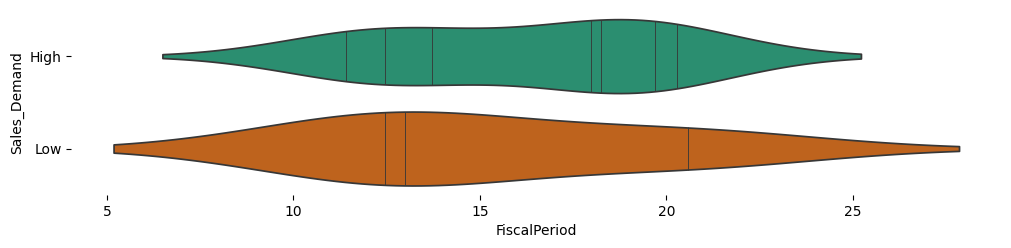

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Sales_Demand'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='FiscalPeriod', y='Sales_Demand', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

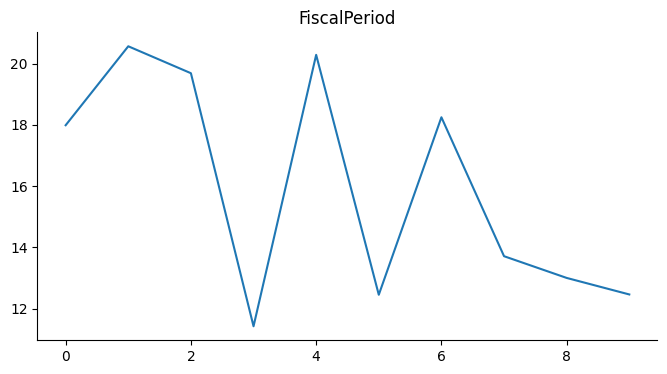

In [ ]:
from matplotlib import pyplot as plt
_df_13['FiscalPeriod'].plot(kind='line', figsize=(8, 4), title='FiscalPeriod')
plt.gca().spines[['top', 'right']].set_visible(False)

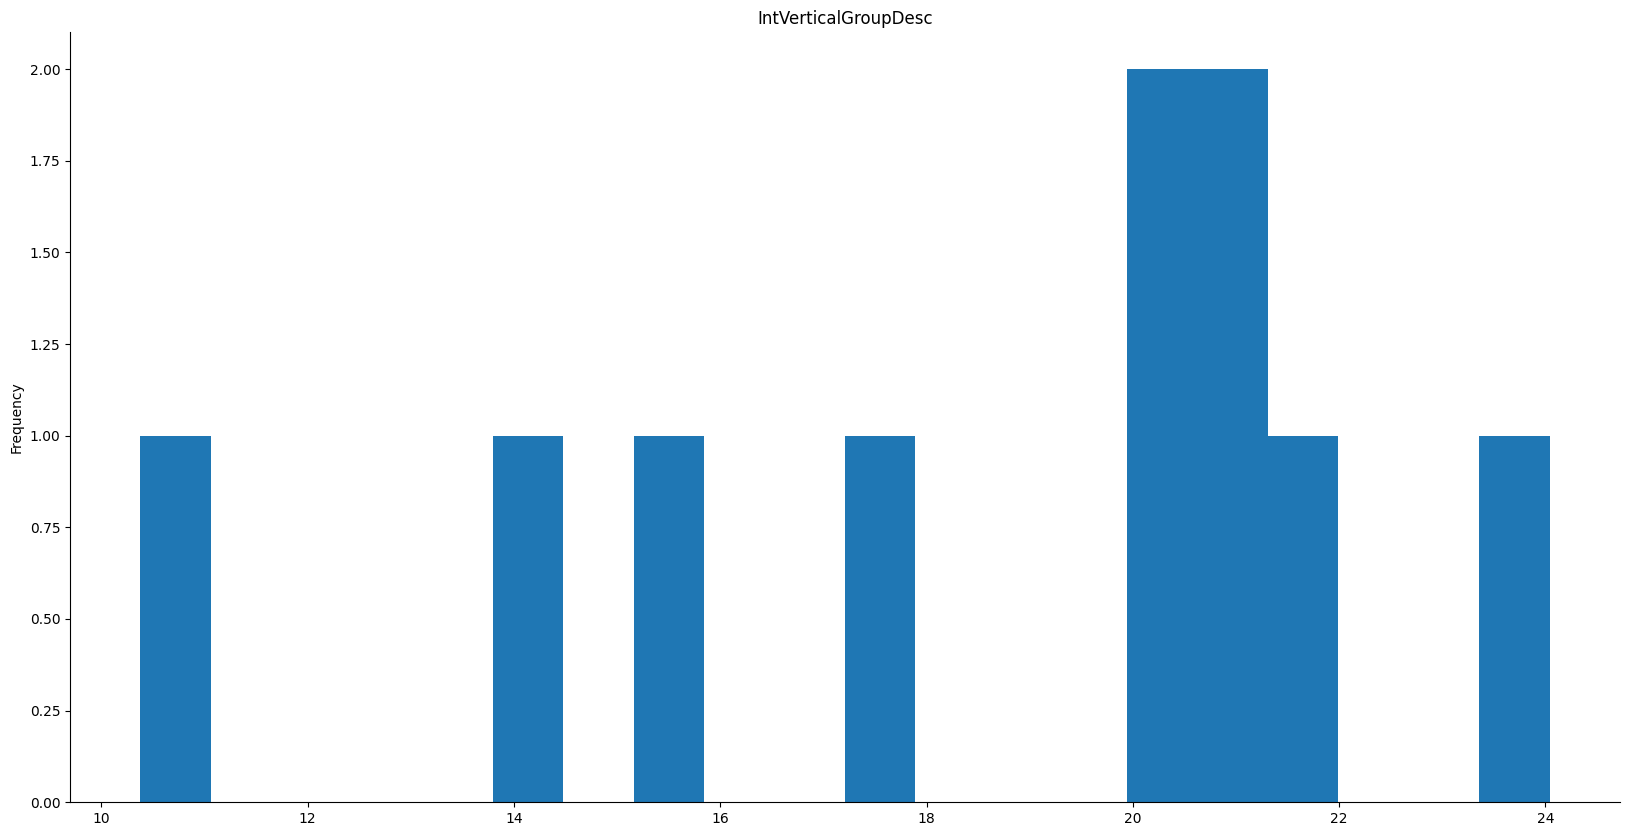

In [ ]:
from matplotlib import pyplot as plt
_df_1['IntVerticalGroupDesc'].plot(kind='hist', bins=20, title='IntVerticalGroupDesc')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
clinic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FiscalPeriod                   3000 non-null   float64
 1   IntVerticalGroupDesc           3000 non-null   float64
 2   CurrencyCode                   3000 non-null   int64  
 3   COS & OE                       3000 non-null   float64
 4   Net Revenue                    3000 non-null   float64
 5   Gross Profit                   3000 non-null   float64
 6   Volume - Pounds/Dry            3000 non-null   float64
 7   BP Net Rev                     3000 non-null   float64
 8   VolumeCust_Actual_LB           3000 non-null   float64
 9   CC1Region                      3000 non-null   int64  
 10  SalesDistrictDesc              3000 non-null   float64
 11  SalesOfficeDesc                3000 non-null   float64
 12  SalesGroupDesc                 3000 non-null   f

In [ ]:
clinic_data= clinic_data.dropna()
clinic_data= clinic_data.drop_duplicates()
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2998
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FiscalPeriod                   2999 non-null   float64
 1   IntVerticalGroupDesc           2999 non-null   float64
 2   CurrencyCode                   2999 non-null   int64  
 3   COS & OE                       2999 non-null   float64
 4   Net Revenue                    2999 non-null   float64
 5   Gross Profit                   2999 non-null   float64
 6   Volume - Pounds/Dry            2999 non-null   float64
 7   BP Net Rev                     2999 non-null   float64
 8   VolumeCust_Actual_LB           2999 non-null   float64
 9   CC1Region                      2999 non-null   int64  
 10  SalesDistrictDesc              2999 non-null   float64
 11  SalesOfficeDesc                2999 non-null   float64
 12  SalesGroupDesc                 2999 non-null   float6

In [ ]:
clinic_data.dropna(thresh=0.8*len(clinic_data),axis=1,inplace=True)
clinic_data.dtypes

FiscalPeriod            float64
IntVerticalGroupDesc    float64
CurrencyCode              int64
COS & OE                float64
Net Revenue             float64
                         ...   
CustomerGroup1Desc      float64
Division                float64
BP DOP                  float64
Total Revenue           float64
Sales_Demand             object
Length: 63, dtype: object

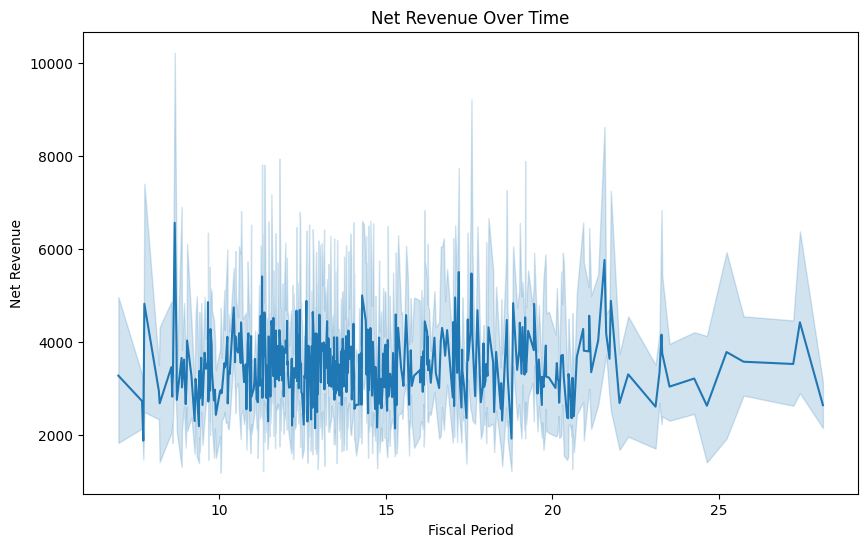

In [ ]:
# Assuming 'clinic_data' is your DataFrame
# Time Series Analysis (Line plot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=clinic_data, x='FiscalPeriod', y='Net Revenue')
plt.title('Net Revenue Over Time')
plt.xlabel('Fiscal Period')
plt.ylabel('Net Revenue')
plt.show()

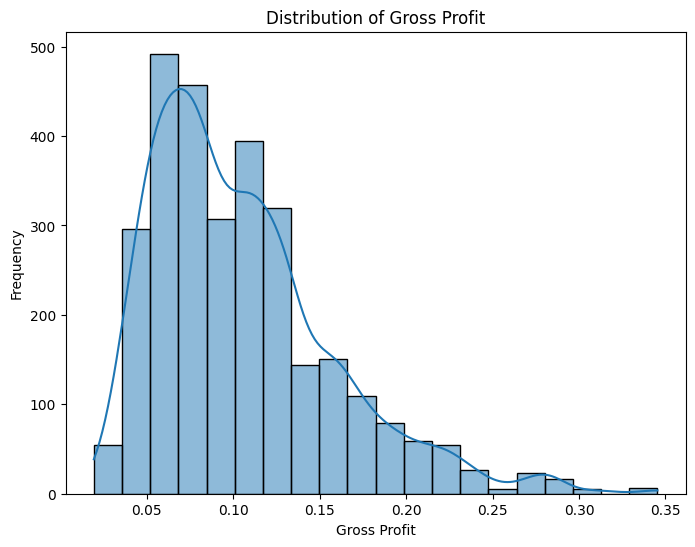

In [ ]:
# Distribution Analysis (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(clinic_data['Gross Profit'], bins=20, kde=True)
plt.title('Distribution of Gross Profit')
plt.xlabel('Gross Profit')
plt.ylabel('Frequency')
plt.show()

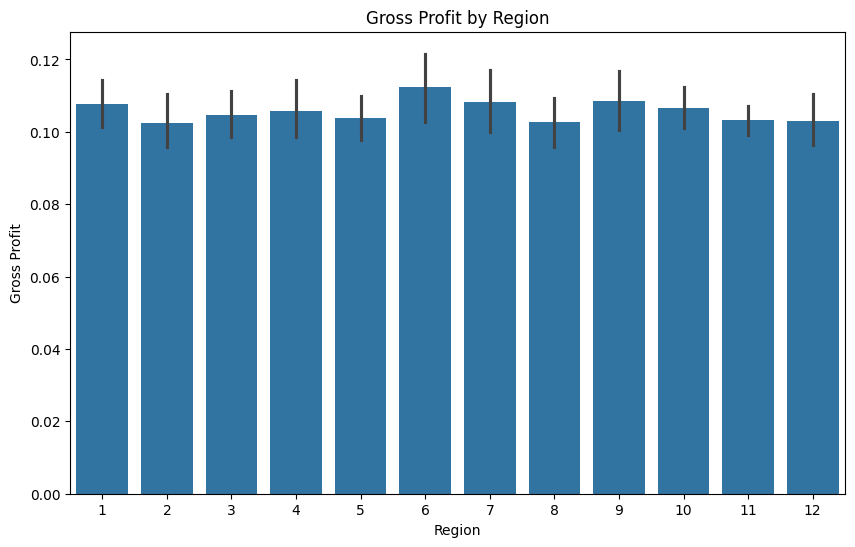

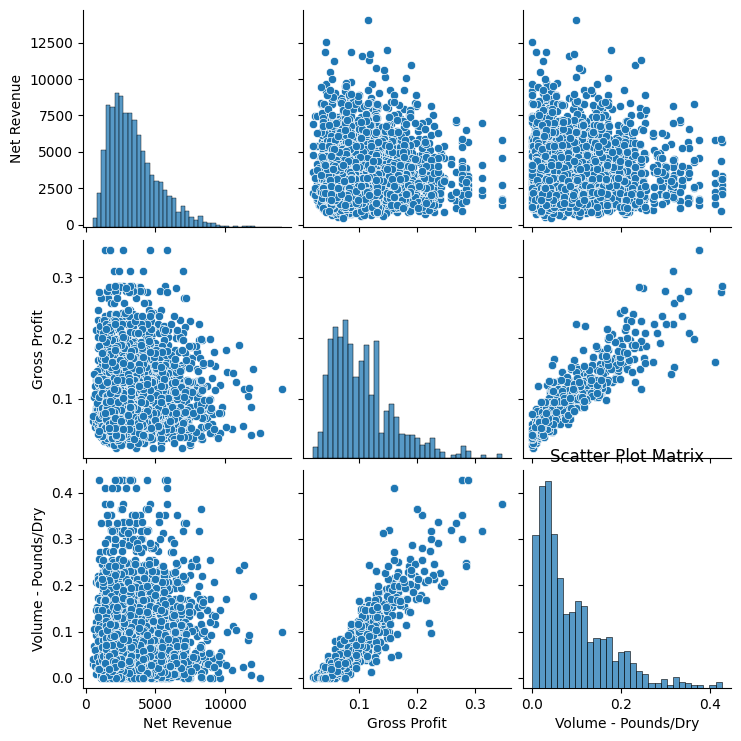

In [ ]:
# Comparison Analysis (Bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=clinic_data, x='CC1Region', y='Gross Profit')
plt.title('Gross Profit by Region')
plt.xlabel('Region')
plt.ylabel('Gross Profit')
plt.show()

# Correlation Analysis (Scatter plot matrix)
sns.pairplot(clinic_data[['Net Revenue', 'Gross Profit', 'Volume - Pounds/Dry']])
plt.title('Scatter Plot Matrix')
plt.show()

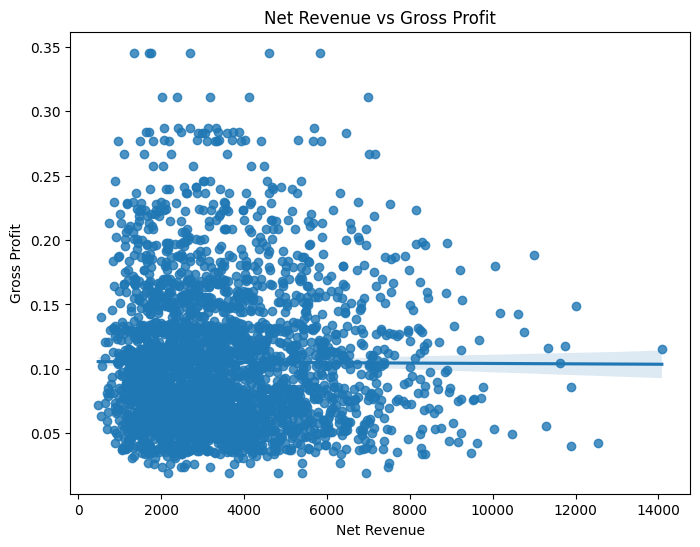

In [ ]:
# Trend Analysis (Scatter plot with trend line)
plt.figure(figsize=(8, 6))
sns.regplot(data=clinic_data, x='Net Revenue', y='Gross Profit')
plt.title('Net Revenue vs Gross Profit')
plt.xlabel('Net Revenue')
plt.ylabel('Gross Profit')
plt.show()

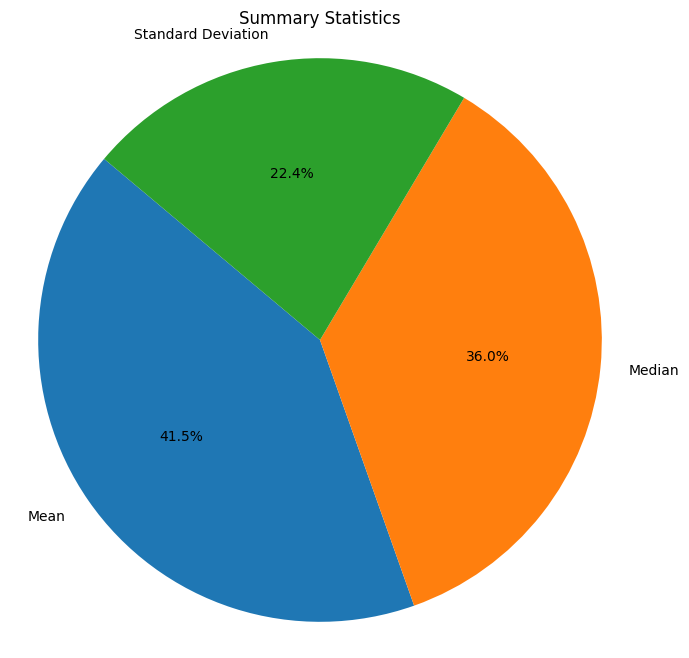

In [ ]:


summary_stats = clinic_data.describe()

# Extracting mean, median, and standard deviation
mean_values = summary_stats.loc['mean']
median_values = summary_stats.loc['50%']  # Median is the 50th percentile
std_values = summary_stats.loc['std']

# Pie chart
labels = ['Mean', 'Median', 'Standard Deviation']
values = [mean_values.sum(), median_values.sum(), std_values.sum()]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Summary Statistics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


                      FiscalPeriod  IntVerticalGroupDesc  CurrencyCode  \
FiscalPeriod              1.000000              0.326664     -0.008935   
IntVerticalGroupDesc      0.326664              1.000000      0.008573   
CurrencyCode             -0.008935              0.008573      1.000000   
COS & OE                  0.987424              0.323466     -0.008777   
Net Revenue               0.014370              0.027237     -0.058520   
...                            ...                   ...           ...   
MaterialDesc              0.740436              0.296188     -0.027385   
CustomerGroup1Desc        0.165631              0.105819     -0.005138   
Division                  0.005256              0.120069     -0.038094   
BP DOP                    1.000000              0.326664     -0.008935   
Total Revenue             0.326664              1.000000      0.008573   

                      COS & OE  Net Revenue  Gross Profit  \
FiscalPeriod          0.987424     0.014370      0

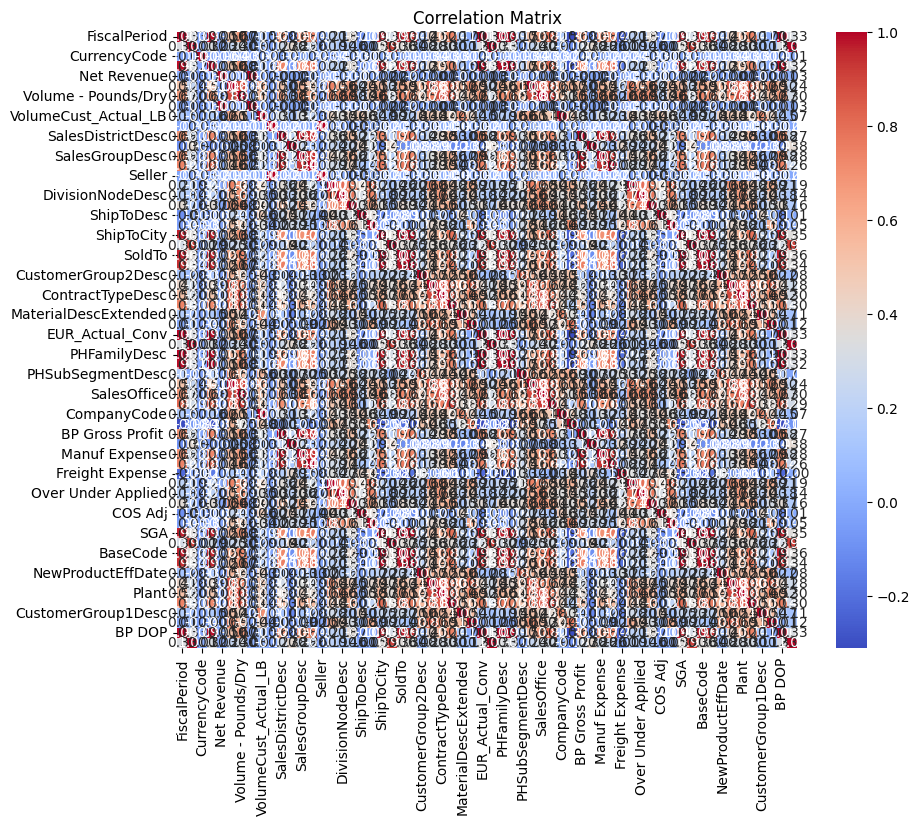

In [ ]:
# Selecting only numeric columns
numeric_columns = clinic_data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



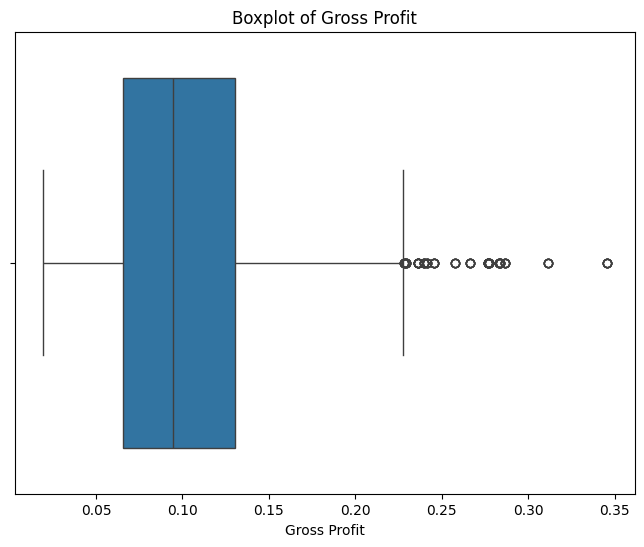

In [ ]:
# Box plot of Gross Profit to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=clinic_data['Gross Profit'])
plt.title('Boxplot of Gross Profit')
plt.xlabel('Gross Profit')
plt.show()


In [13]:

 # Title for the model
model_title = "Logistic Regression Model"



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_excel("/content/Clinical_Sales (1).xlsx")

# Define features (X) and target variable (y)
X = data.drop(columns=["Sales_Demand"])
y = data["Sales_Demand"]

# Convert categories to numeric values
y = y.map({"High": 1, "Low": 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6066666666666667


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_excel("/content/Clinical_Sales (1).xlsx")  # Replace "your_dataset.csv" with the actual filename

# Define features (X) and target variable (y)
X = data.drop(columns=["Sales_Demand"])
y = data["Sales_Demand"]

# Convert categories to numeric values
y = y.map({"High": 1, "Low": 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)


Decision Tree Classifier:
Accuracy: 0.49833333333333335

Random Forest Classifier:
Accuracy: 0.49
